In [30]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import numpy as np

**Data Taken From:** https://www.kaggle.com/wordsforthewise/lending-club </br>
**Model is From:** https://www.kaggle.com/benesalvatore/predict-default-using-logisitic-regression

In [31]:
features = ['loan_amnt', 'annual_inc', 'term', 'emp_length']

In [32]:
a = pd.read_csv('accepted_2007_to_2018Q4.csv', usecols=features+['loan_status'])

In [33]:
a


,loan_amnt,term,emp_length,annual_inc,loan_status
0,3600.0,36 months,10+ years,55000.0,Fully Paid
1,24700.0,36 months,10+ years,65000.0,Fully Paid
2,20000.0,60 months,10+ years,63000.0,Fully Paid
3,35000.0,60 months,10+ years,110000.0,Current
4,10400.0,60 months,3 years,104433.0,Fully Paid
...,...,...,...,...,...
2260696,40000.0,60 months,9 years,227000.0,Current
2260697,24000.0,60 months,6 years,110000.0,Charged Off
2260698,14000.0,60 months,10+ years,95000.0,Current
2260699,NaN,NaN,NaN,NaN,NaN


In [34]:
# Eliminate rows that do not have Fully Paid or Charged Off in the column loan_status
full_set = a.query("loan_status in ('Fully Paid', 'Charged Off')").copy()

In [35]:
full_set.sample(5)

,loan_amnt,term,emp_length,annual_inc,loan_status
68203,8000.0,36 months,7 years,63000.0,Fully Paid
668431,35000.0,60 months,10+ years,85000.0,Fully Paid
418129,6400.0,36 months,10+ years,75000.0,Charged Off
6003,24000.0,60 months,3 years,82000.0,Charged Off
208653,4800.0,36 months,9 years,75000.0,Fully Paid


In [36]:
# Eliminate rows with empty fields in emp_length
full_set = full_set.dropna(subset=['emp_length'])

In [37]:
full_set.sample(5)


,loan_amnt,term,emp_length,annual_inc,loan_status
1056826,30000.0,36 months,2 years,108000.0,Charged Off
1864356,31300.0,60 months,< 1 year,70000.0,Charged Off
1744170,40000.0,36 months,10+ years,200000.0,Fully Paid
1418808,5000.0,36 months,10+ years,56500.0,Fully Paid
1709530,16800.0,36 months,10+ years,101000.0,Fully Paid


# Build the model - Logistic Regression

1. Transform our Label *loan_status* and other columns

In [38]:
# Change for 1 & 0 withinn loan_status; & 36 o 60  in term
full_set['loan_status'] = full_set['loan_status'].replace(
    {
        'Fully Paid': 1,
        'Charged Off': 0
    }
)

full_set['term'] = full_set['term'].replace(
    {
        ' 36 months': 36,
        ' 60 months': 60
    }
)

In [39]:
full_set

,loan_amnt,term,emp_length,annual_inc,loan_status
0,3600.0,36,10+ years,55000.0,1
1,24700.0,36,10+ years,65000.0,1
2,20000.0,60,10+ years,63000.0,1
4,10400.0,60,3 years,104433.0,1
5,11950.0,36,4 years,34000.0,1
...,...,...,...,...,...
2260688,18000.0,60,5 years,130000.0,1
2260690,29400.0,60,9 years,180792.0,1
2260691,32000.0,60,3 years,157000.0,0
2260692,16000.0,60,10+ years,150000.0,1


In [40]:
#Split emp_lenght column and select the first element
full_set['emp_length'] = full_set['emp_length'].map(lambda x: x.split(' ')[0])
full_set

,loan_amnt,term,emp_length,annual_inc,loan_status
0,3600.0,36,10+,55000.0,1
1,24700.0,36,10+,65000.0,1
2,20000.0,60,10+,63000.0,1
4,10400.0,60,3,104433.0,1
5,11950.0,36,4,34000.0,1
...,...,...,...,...,...
2260688,18000.0,60,5,130000.0,1
2260690,29400.0,60,9,180792.0,1
2260691,32000.0,60,3,157000.0,0
2260692,16000.0,60,10+,150000.0,1


In [41]:
#Clean emp_lenght column
full_set['emp_length'] = full_set['emp_length'].map(lambda x: str(x).replace('+', '').replace('<', '0'))
full_set

,loan_amnt,term,emp_length,annual_inc,loan_status
0,3600.0,36,10,55000.0,1
1,24700.0,36,10,65000.0,1
2,20000.0,60,10,63000.0,1
4,10400.0,60,3,104433.0,1
5,11950.0,36,4,34000.0,1
...,...,...,...,...,...
2260688,18000.0,60,5,130000.0,1
2260690,29400.0,60,9,180792.0,1
2260691,32000.0,60,3,157000.0,0
2260692,16000.0,60,10,150000.0,1


In [42]:
full_set

,loan_amnt,term,emp_length,annual_inc,loan_status
0,3600.0,36,10,55000.0,1
1,24700.0,36,10,65000.0,1
2,20000.0,60,10,63000.0,1
4,10400.0,60,3,104433.0,1
5,11950.0,36,4,34000.0,1
...,...,...,...,...,...
2260688,18000.0,60,5,130000.0,1
2260690,29400.0,60,9,180792.0,1
2260691,32000.0,60,3,157000.0,0
2260692,16000.0,60,10,150000.0,1


**Build Model**

In [43]:
#Split the dataframe into y = loan status  & x= rest of the variables
model_features = list(full_set.columns)
model_features

['loan_amnt', 'term', 'emp_length', 'annual_inc', 'loan_status']

In [44]:
model_features.remove('loan_status')

In [45]:
full_set[model_features]

,loan_amnt,term,emp_length,annual_inc
0,3600.0,36,10,55000.0
1,24700.0,36,10,65000.0
2,20000.0,60,10,63000.0
4,10400.0,60,3,104433.0
5,11950.0,36,4,34000.0
...,...,...,...,...
2260688,18000.0,60,5,130000.0
2260690,29400.0,60,9,180792.0
2260691,32000.0,60,3,157000.0
2260692,16000.0,60,10,150000.0


In [46]:
full_set

,loan_amnt,term,emp_length,annual_inc,loan_status
0,3600.0,36,10,55000.0,1
1,24700.0,36,10,65000.0,1
2,20000.0,60,10,63000.0,1
4,10400.0,60,3,104433.0,1
5,11950.0,36,4,34000.0,1
...,...,...,...,...,...
2260688,18000.0,60,5,130000.0,1
2260690,29400.0,60,9,180792.0,1
2260691,32000.0,60,3,157000.0,0
2260692,16000.0,60,10,150000.0,1


In [47]:
full_set.to_csv (r'Loan_clean_data.csv', index = False, header=True)

In [48]:
y=full_set['loan_status']
x=full_set[model_features]

In [49]:
x.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1266799 entries, 0 to 2260697
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   loan_amnt   1266799 non-null  float64
 1   term        1266799 non-null  int64  
 2   emp_length  1266799 non-null  object 
 3   annual_inc  1266799 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 48.3+ MB


In [51]:
x=x.astype(float)

,loan_amnt,term,emp_length,annual_inc
loan_amnt,1.000000,0.377807,0.089391,0.304917
term,0.377807,1.000000,0.055466,0.044038
emp_length,0.089391,0.055466,1.000000,0.066329
annual_inc,0.304917,0.044038,0.066329,1.000000


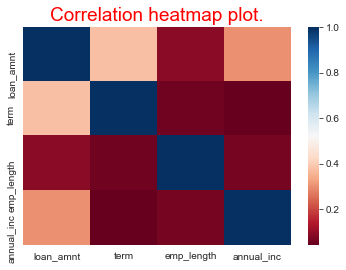

In [52]:
corr=x.corr()
display(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')
plt.title('Correlation heatmap plot.', fontsize=19,  color='red')
plt.show()

#  Correlation between variables

,loan_amnt,term,emp_length,annual_inc
loan_amnt,1.000000,0.377807,0.089391,0.304917
term,0.377807,1.000000,0.055466,0.044038
emp_length,0.089391,0.055466,1.000000,0.066329
annual_inc,0.304917,0.044038,0.066329,1.000000


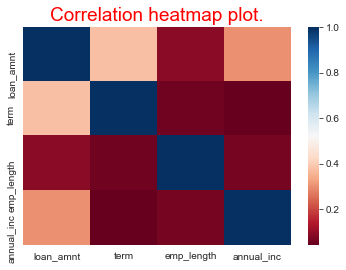

In [53]:
#Check the correlation
corr=x.corr()
display(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')
plt.title('Correlation heatmap plot.', fontsize=19,  color='red')
plt.show()

In [21]:
# train and test splitting of the data
# 42 is just a seed 
#the test size is 25 default
X_train, X_test, y_train, y_test = train_test_split(
    full_set[model_features],
    full_set['loan_status'],
    random_state=42
)

# Logistic Regression Model

In [50]:
model = LogisticRegression()
# a scaler to get data with  better values
scaler = MinMaxScaler()

In [51]:
pipeline = Pipeline([('scaler', scaler), ('model', model)])

In [52]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression())])

In [53]:
pred_model=pipeline.predict(X_test)

In [54]:
print(classification_report(y_test,pred_model))
print(confusion_matrix(y_test,pred_model))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     61782
           1       0.80      1.00      0.89    254918

    accuracy                           0.80    316700
   macro avg       0.40      0.50      0.45    316700
weighted avg       0.65      0.80      0.72    316700

[[     0  61782]
 [     0 254918]]


In [55]:
model_as =accuracy_score(y_test,pred_model)
model_as

0.8049194821597726

**Test Model**

ROC-AUC-score:  0.634209472479741


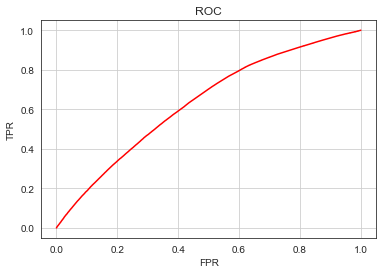

In [58]:
test_probas = pipeline.predict_proba(X_test)[:,1]

fpr, tpr, tresholds = roc_curve(y_test, test_probas)
plt.plot(fpr, tpr, color='red')
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()

print('ROC-AUC-score: ', roc_auc_score(y_test, test_probas))

In [59]:
def _compute_accuracy_for_thresholds(data: pd.core.frame.DataFrame):
    """
    Compute Classifier's Accuracy for various thresholds
    """
    
    thresholds = np.linspace(0, 1, 100)
    
    accuracies = []
    
    for threshold in thresholds:
        preds = data['preds'].map(lambda x: 1 if x > threshold else 0)
        accuracy_ = accuracy_score(data['labels'].values, preds)
        accuracies.append(accuracy_)
    
    return accuracies, thresholds

In [60]:
X_test['preds'] = test_probas
X_test['labels'] = y_test

In [61]:
accuracies, thresholds = _compute_accuracy_for_thresholds(X_test)

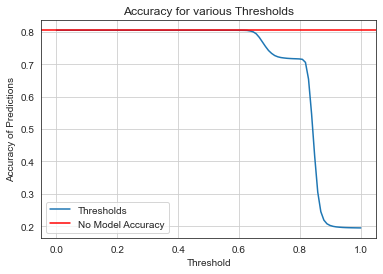

In [62]:
plt.plot(thresholds.reshape(-1, 1), accuracies, label='Thresholds')
plt.axhline(
    (X_test['labels'].sum()) / len(X_test), color='red', label='No Model Accuracy')
plt.grid()
plt.title('Accuracy for various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Accuracy of Predictions')
plt.legend()
plt.show()

In [63]:
accuracy_score(X_test['labels'].values, list(map(lambda x: 1 if x > 0.7 else 0, X_test['preds'])))

0.7393148089674771

# 3.3.1 Support Vector Model

In [64]:
svmx=svm.SVC()
svmx.fit(X_train, y_train)
pred_svm=svmx.predict(X_test)
pred_svm

ValueError: X.shape[1] = 6 should be equal to 4, the number of features at training time

In [ ]:
print(classification_report(y_test, predict_svm)

In [ ]:
print(confusion_matrix(y_test, predict_svm))

In [ ]:
a=RandomForestClassifier(n_estimators=200)
a.fit(X_train, y_train)
pred_a=a.predict(X_test)
print(pred_a)

In [ ]:
pred_p=pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_p)

**Save Pipeline**

In [ ]:
with open('app/model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [ ]:
model = pickle.load(
    open('app/model.pkl', 'rb')
)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
ypred = model.predict(X_test)

In [ ]:
print(ypred)